In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
# ^^ display graph on screen

# Getting Our Survey Data Into Python

Read in our file

In [6]:
file_name = "Northern Branch Phase II Debris Removal Ops.xlsx"
df = pd.read_excel(file_name)

The df tells Python we want to look at that DataFrame we just made with our CSV data, the . tells Python that we’re going to do something to that DataFrame, and then the head() tells Python what we want to do: display the first five rows.

In [7]:
df.head()

,APN,Structural Status,Haz Tree Only,# of Trees,Haz Trees Assessment,Haz Trees,Hazard Tree Status,Street #,Unit #,Street Name,...,Trinity Lease Lots Eligibility,Hazard Tree Work Package,Tree Felling Complete,Tree Removal Complete,Number of Trees Felled,Trees Final Site Walk,duplicate,Sync Status,Butte Vehicle Recon,Soils Hold
0,062-130-003-000,Ready for Tree Operations,1.0,146.0,2021-05-07,Yes,Hazard Trees Felled,062-130-003-000,NaN,001.80 AC SEC 27 T21N R5E,...,NaN,Butte_WP_09,2021-06-14,NaT,144.0,NaN,NaN,NaN,NaN,NaN
1,044-010-053-000,Ready for Tree Operations,NaN,52.0,2021-02-23,Yes,Hazard Trees Felled,12122,NaN,Platina Road,...,NaN,Shasta_WP_02,2021-06-23,NaT,52.0,NaN,NaN,NaN,NaN,NaN
2,044-010-020-000,Returned to County,NaN,0.0,2021-01-06,No,No Hazard Trees,12485,NaN,Platina Road,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,041-650-061-000,Returned to County,NaN,0.0,2020-12-26,No,No Hazard Trees,13634,NaN,Platina Road,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,045-730-005-000,Ready for Tree Operations,NaN,9.0,2021-01-13,Yes,Hazard Trees Assessed,045-730-005-000,NaN,Platina Road,...,NaN,Shasta_WP_02,NaT,NaT,4.0,NaN,NaN,NaN,NaN,NaN


We might also notice a few other weird things in this data, like the appearance of NaN in some rows. We’ll deal with that later, but first, let’s take a closer look at our data set using another pandas feature called .shape to give us the size of our data set.

In [9]:
df.shape
# 2228 rows and 118 columns

(2228, 118)

find out our column heading. Put as a list to see them all without messing with our display defaults

In [24]:
df.columns.to_list()

['APN',
 'Structural Status',
 'Haz Tree Only',
 '# of Trees',
 'Haz Trees Assessment',
 'Haz Trees',
 'Hazard Tree Status',
 'Street #',
 'Unit #',
 'Street Name',
 'City',
 'County',
 'Division',
 'Hold Reason',
 'Hold',
 'Gate Locked?',
 'Code/Key Location',
 'ROE Verified',
 'Declaration',
 'Property Type',
 'Commercial Notes',
 'Scheduled',
 'Consultant',
 'Debris Crew',
 'Debris Crew Leader/Crew#',
 'Debris Crew WO#',
 'ROE Date',
 'Priority',
 'Withdrawal',
 'Not Eligible',
 'Reason for Ineligibility',
 'Determinant for Ineligibility',
 'Safety Concern Property',
 'Phase 1 Complete',
 'Needs Milk Run or Phase 1 Revisit',
 'Milk Run/Phase 1 Revisit Complete',
 'Access Issues',
 'EHP Attention Required',
 'EHP Attn Notes',
 'Monitoring Needed',
 'Monitoring Needed Description',
 'Bio Assessment Notes',
 'Arch Assessment Notes',
 'CalOES Review Notes',
 'Permit Needed',
 'Permit Description',
 'Owner Name',
 'Contact Phone',
 'Contact Email',
 'Site Assessment',
 'RAD/MERC Sweep',


# Analyzing Multiple Choice Survey Questions

The value_counts() function looks at a single column of data at a time and counts how many instances of each unique entry that column contains. (A single column is called a Series in pandas lingo, so you may see this function referred to as Series.value_counts() doc. here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

To use it, all we need to do is tell Python the specific Series (a.k.a. column) we want to look at, and then tell it to execute .value_counts(). We can specify a specific column by writing the name of the dataframe, followed by the name of the column inside brackets, like so: df['Not Eligible']
(Just like with our list, since 'Not Eligible' is a string of characters rather than a number or a variable name, we need to put it inside apostrophes or quotation marks to keep Python from getting confused)

In [17]:
df['Not Eligible'].value_counts()
# if we have true and fals it will count each for us.

1.0    166
Name: Not Eligible, dtype: int64

lets do the same as above but with True or Flase/Yes, No, Do not assess in a column

In [23]:
df['Haz Trees'].value_counts()

Yes              924
Do Not Assess    864
No               324
Name: Haz Trees, dtype: int64

It might be more helpful to see that represented as a percentage of the total number of responses, though. Thankfully, we can do that by simply adding an input inside the value_counts() parentheses. Function inputs are called arguments in programming, and can use them to pass information to the function that affects what it will output.
In this case, we’re going to pass an argument that looks like this: normalize=True. The pandas documentation has some details about this, but long story short: value_counts will asCREWe we want normalize to be False if we don’t put anything inside the function, and thus it will return the raw counts for each value.
However, if we set normalize to True, it will “normalize” the counts by representing them as a percentage of the total number of rows in the pandas series we’ve specified.

In [1]:
df['Haz Trees'].value_counts(normalize=True)

Yes              0.437500
Do Not Assess    0.409091
No               0.153409
Name: Haz Trees, dtype: float64

# Plotting Multiple Choice Answers

Plot a graph by the following codes.
our code: .plot(kind='bar'). This tells Python to take whatever we’ve just given it and plot the results in a bar graph. (We could replace 'bar' with 'pie' to get a pie chart instead, if we wanted).

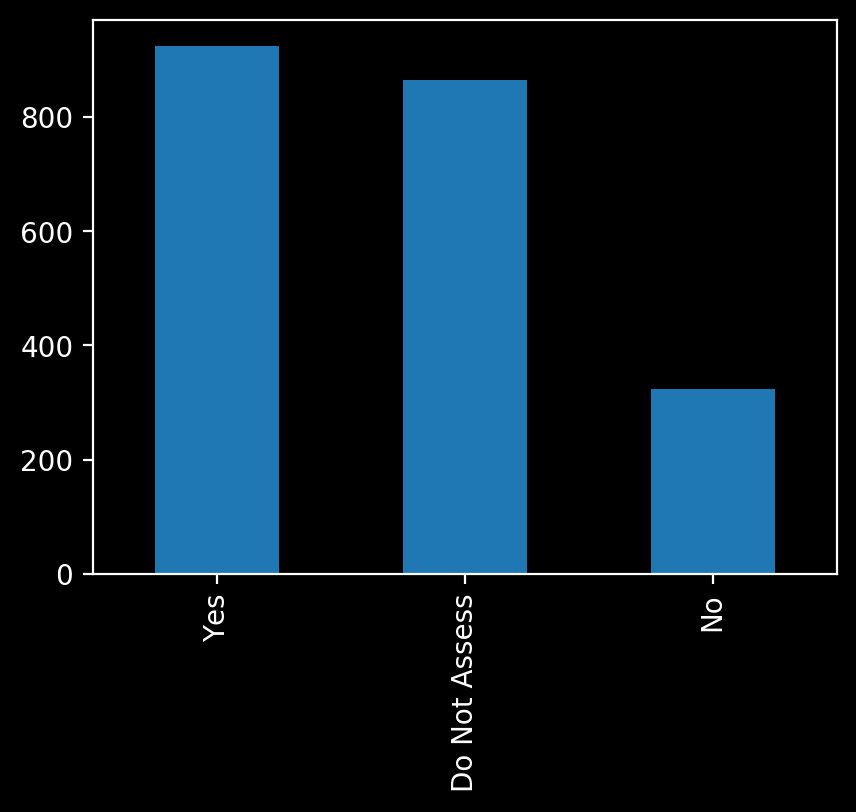

In [5]:
df['Haz Trees'].value_counts().plot(kind='bar')

That’s already pretty cool, but we can make this look even better very quickly by adding a couple more arguments to that .plot() function. Specifically, let’s add two:
An argument called figsize that defines the size of the chart in the form of a width and height in inches (i.e. (15,7)
An argument called color that defines the color of the bars.

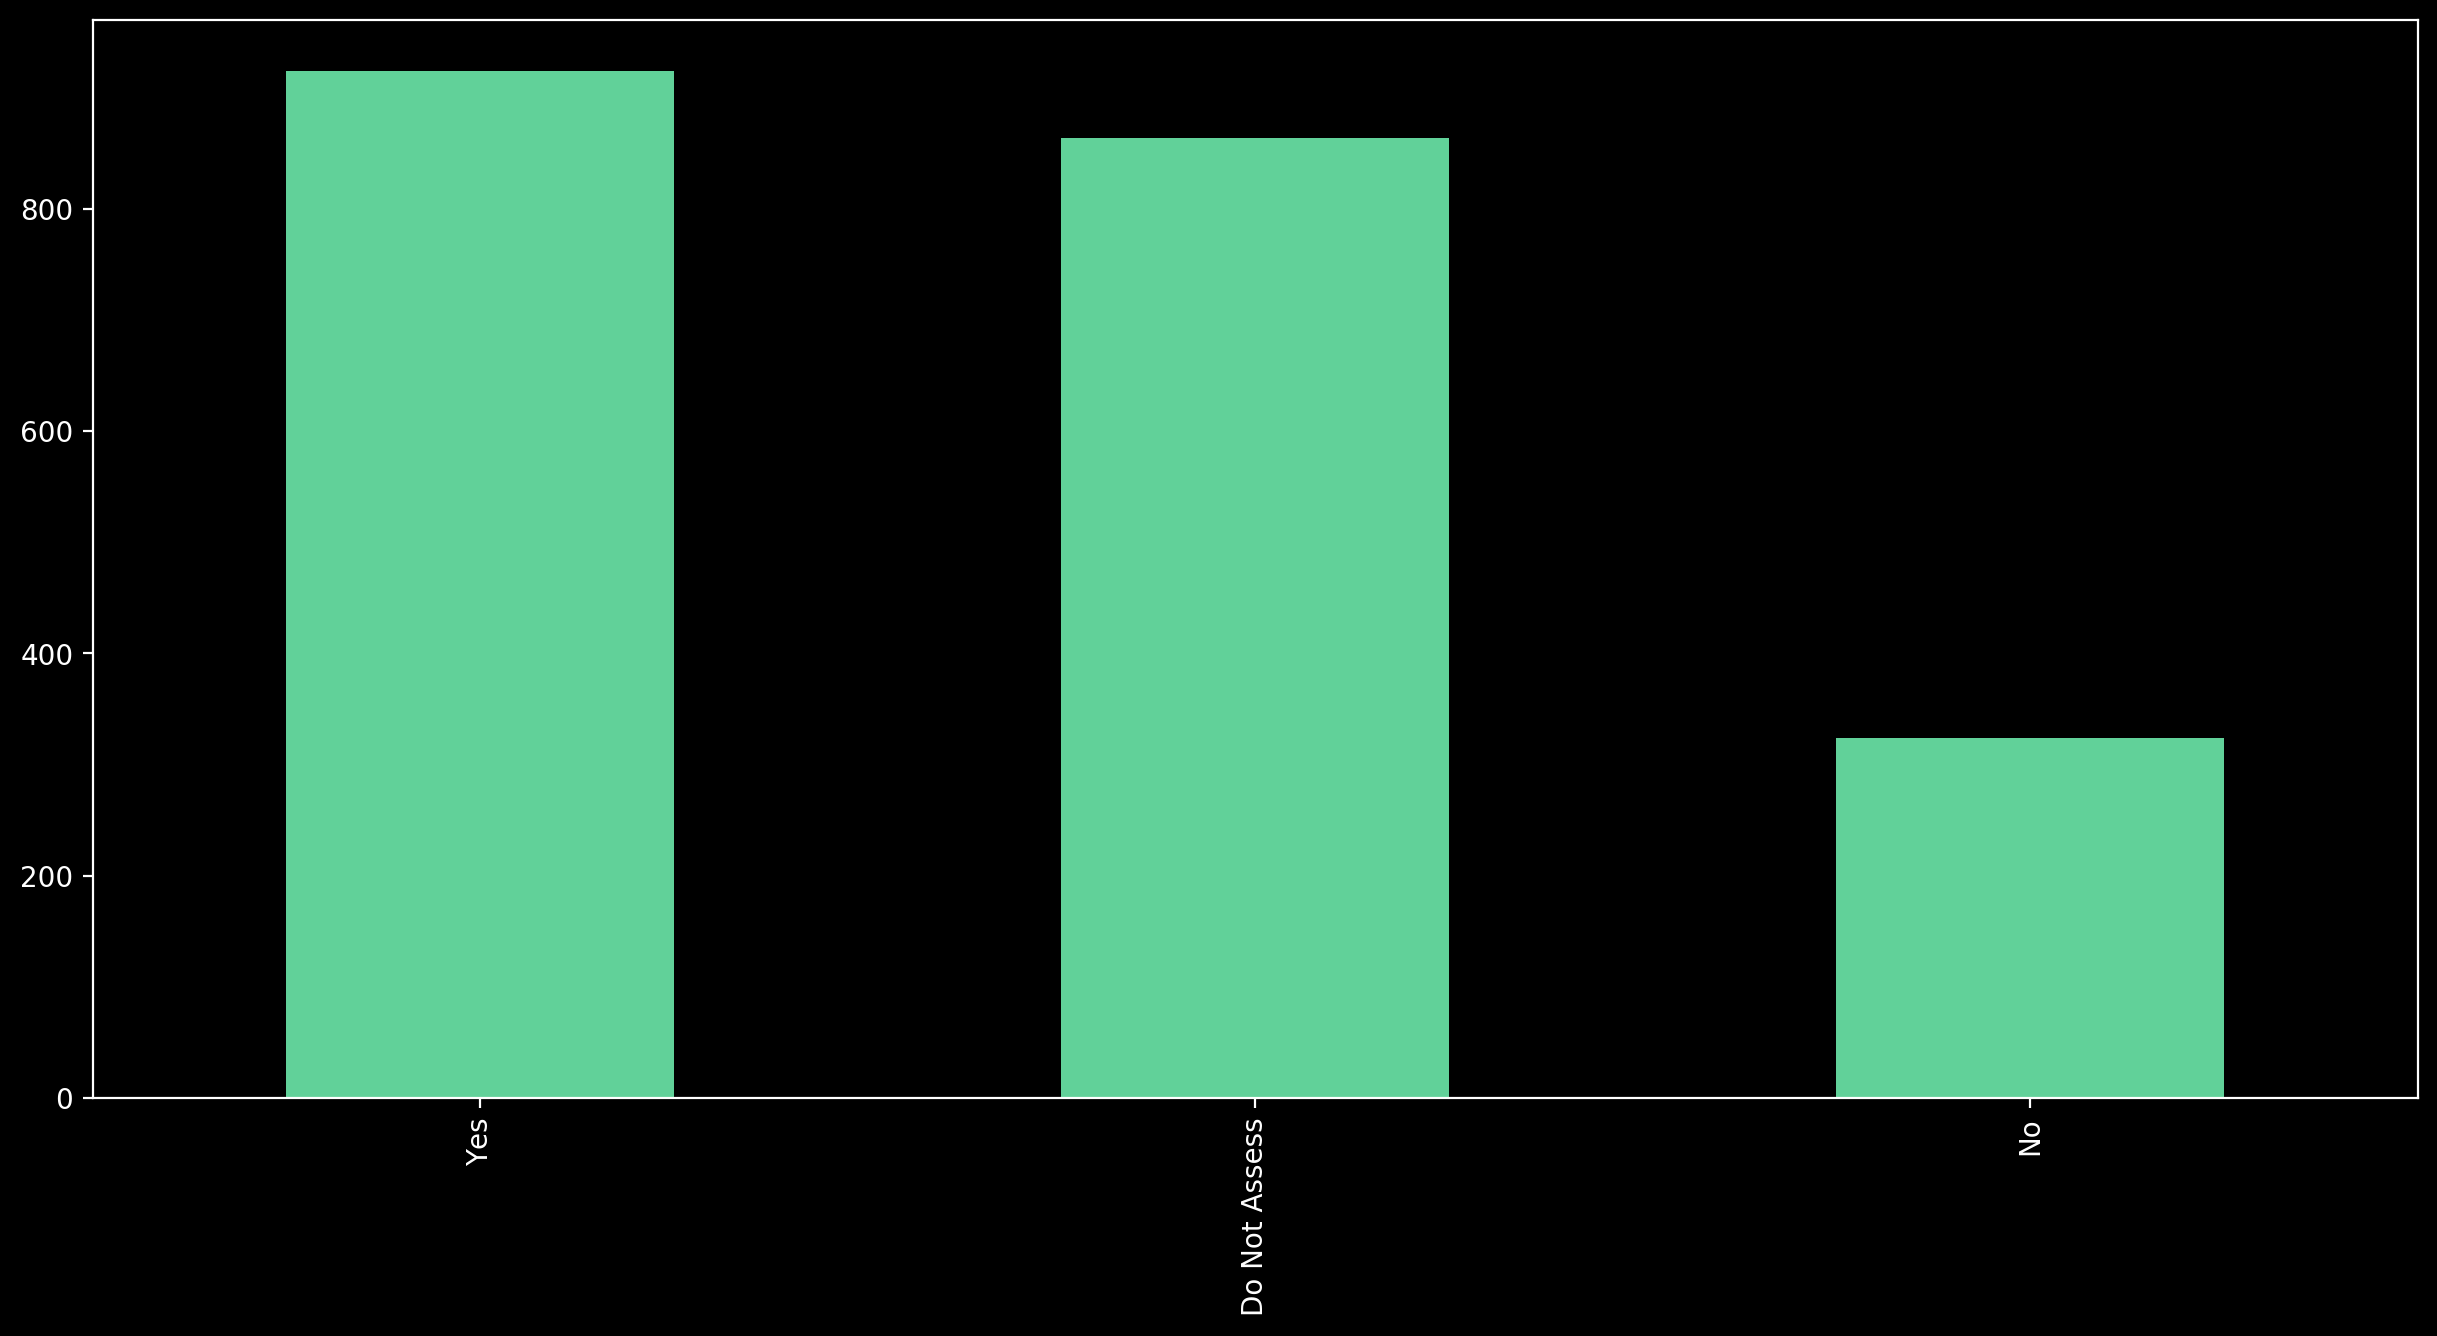

In [7]:
df['Haz Trees'].value_counts().plot(kind='bar', figsize=(15,7), color='#61d199')

# Analyzing Subsets of Survey Data

We can find out using what’s called a Boolean to sort our data and show only the responses of people who answered ‘Yes’ or ‘No’ to that question.
We’ll create our Boolean by specifying the DataFrame and Series (i.e., column) we want to look at, and then filtering for only the responses in that Series that meet a certain criteria by using a conditional operator.

In [9]:
said_yes = df[df['Haz Trees'] == 'Yes']
said_yes.head(3)

,APN,Structural Status,Haz Tree Only,# of Trees,Haz Trees Assessment,Haz Trees,Hazard Tree Status,Street #,Unit #,Street Name,City,County,Division,Hold Reason,Hold,Gate Locked?,Code/Key Location,ROE Verified,Declaration,Property Type,Commercial Notes,Scheduled,Consultant,Debris Crew,Debris Crew Leader/Crew#,Debris Crew WO#,ROE Date,Priority,Withdrawal,Not Eligible,Reason for Ineligibility,Determinant for Ineligibility,Safety Concern Property,Phase 1 Complete,Needs Milk Run or Phase 1 Revisit,Milk Run/Phase 1 Revisit Complete,Access Issues,EHP Attention Required,EHP Attn Notes,Monitoring Needed,...,"If Unable to Contact, Attempted # of Contacts","If Unable to Contact, Who Approved to Move Forward",811 Called,Debris Start,Debris Finish,State Rep Sign-Off for DR,Damage Caused during DR,Explanation of Damage during DR,Soil Sample,Soil Sample Results,Soil Boring,Soil Boring Results,Soil Re-scrape,Re-scrape Results,Soil Re-scrape 2,Re-scrape 2 Results,Soil Samples Approved,Hydromulch Complete,Wattles Complete,Erosion Control Waiver,FSO Complete,FSO Sent to County,Special Notes,Insurance,Latitude,Longitude,Lake Madrone Property,County Notified of Ineligibility,Approved for Special Inclusion,Tree Eligibility (Butte/Shasta/Trinity/Siskiyou),Trinity Lease Lots Eligibility,Hazard Tree Work Package,Tree Felling Complete,Tree Removal Complete,Number of Trees Felled,Trees Final Site Walk,duplicate,Sync Status,Butte Vehicle Recon,Soils Hold
0,062-130-003-000,Ready for Tree Operations,1.0,146.0,2021-05-07,Yes,Hazard Trees Felled,062-130-003-000,NaN,001.80 AC SEC 27 T21N R5E,Berry Creek,Butte,Butte North,NaN,NaN,NaN,NaN,ROE Verified,DR-4558,Residential,NaN,NaT,NaN,HAZ TREE ONLY,NaN,NaN,2021-03-18,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN,Yes,39.644187,-121.405691,1.0,NaN,NaN,Butte Eligible,NaN,Butte_WP_09,2021-06-14,NaT,144.0,NaN,NaN,NaN,NaN,NaN
1,044-010-053-000,Ready for Tree Operations,NaN,52.0,2021-02-23,Yes,Hazard Trees Felled,12122,NaN,Platina Road,Ono,Shasta,Shasta,NaN,NaN,NaN,NaN,ROE Verified,DR-4569,Residential,NaN,2021-04-03,Tetra Tech,Erosion Control - Haz Tree,Quentin Perkins/604,REFER TO IAP 04/03 TO 04/07 CREW #604,2021-02-15,NaN,NaT,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,2021-04-08,2021-04-09,2021-04-09,NaN,NaN,2021-04-14 00:00:00,Approved,NaT,NaN,NaN,NaN,NaT,NaN,2021-04-29,NaT,NaT,NaT,NaT,NaT,NaN,No,40.477544,-122.605125,NaN,NaN,NaN,Shasta Eligible,NaN,Shasta_WP_02,2021-06-23,NaT,52.0,NaN,NaN,NaN,NaN,NaN
4,045-730-005-000,Ready for Tree Operations,NaN,9.0,2021-01-13,Yes,Hazard Trees Assessed,045-730-005-000,NaN,Platina Road,Igo,Shasta,Shasta,NaN,NaN,NaN,NaN,ROE Verified,DR-4569,Residential,NaN,2021-03-06,Tetra Tech,Erosion Control - Haz Tree,Quentin Perkins/604,REFER TO IAP 03/03TO 03/06 CREW #604,2021-01-06,NaN,NaT,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,2021-03-12,2021-03-13,2021-03-13,NaN,NaN,2021-03-16 00:00:00,Re-scrape,NaT,NaN,2021-04-24 00:00:00,Approved,NaT,NaN,2021-05-14,NaT,NaT,NaT,NaT,NaT,NaN,No,40.485160,-122.569011,NaN,NaN,NaN,Shasta Eligible,NaN,Shasta_WP_02,NaT,NaT,4.0,NaN,NaN,NaN,NaN,NaN


To confirm that this worked, we can check the size of this dataset with .shape, and compare the number of rows in said_no to the number of people who answered ‘No’ to that question, using our old friend .value_counts().

In [10]:
said_yes.shape

(924, 118)

In [13]:
df['Haz Trees'].value_counts()

Yes              924
Do Not Assess    864
No               324
Name: Haz Trees, dtype: int64

What’s happening here? From left to right:
said_no = is telling Python to create a new variable called said_no, and make it equal to whatever’s on the right side of the equals sign.

df is telling Python to make said_no equivalent to the df DataFrame (our original data set), but then…
[df['Haz Trees'] == 'Yes'] is telling Python to only include rows from df in which the answer in the 'BetterLife' column is equal to 'No'.

Note the double equals sign here. In Python, we use a single equals sign when we want to assign a value, i.e. a = 1. We use a double equals sign to check equivalence, and what Python actually returns is either True or False. In this case, we’re telling Python to only return rows in which df['Haz Trees'] == 'Yes' returns True.

Now that we have this dataframe containing only the ‘No’ answerers, let’s make an equivalent one for the ‘No’ folks and then run some comparisons.

In [14]:
said_no = df[df['Haz Trees'] == "No"]
said_no

,APN,Structural Status,Haz Tree Only,# of Trees,Haz Trees Assessment,Haz Trees,Hazard Tree Status,Street #,Unit #,Street Name,City,County,Division,Hold Reason,Hold,Gate Locked?,Code/Key Location,ROE Verified,Declaration,Property Type,Commercial Notes,Scheduled,Consultant,Debris Crew,Debris Crew Leader/Crew#,Debris Crew WO#,ROE Date,Priority,Withdrawal,Not Eligible,Reason for Ineligibility,Determinant for Ineligibility,Safety Concern Property,Phase 1 Complete,Needs Milk Run or Phase 1 Revisit,Milk Run/Phase 1 Revisit Complete,Access Issues,EHP Attention Required,EHP Attn Notes,Monitoring Needed,...,"If Unable to Contact, Attempted # of Contacts","If Unable to Contact, Who Approved to Move Forward",811 Called,Debris Start,Debris Finish,State Rep Sign-Off for DR,Damage Caused during DR,Explanation of Damage during DR,Soil Sample,Soil Sample Results,Soil Boring,Soil Boring Results,Soil Re-scrape,Re-scrape Results,Soil Re-scrape 2,Re-scrape 2 Results,Soil Samples Approved,Hydromulch Complete,Wattles Complete,Erosion Control Waiver,FSO Complete,FSO Sent to County,Special Notes,Insurance,Latitude,Longitude,Lake Madrone Property,County Notified of Ineligibility,Approved for Special Inclusion,Tree Eligibility (Butte/Shasta/Trinity/Siskiyou),Trinity Lease Lots Eligibility,Hazard Tree Work Package,Tree Felling Complete,Tree Removal Complete,Number of Trees Felled,Trees Final Site Walk,duplicate,Sync Status,Butte Vehicle Recon,Soils Hold
2,044-010-020-000,Returned to County,NaN,0.0,2021-01-06,No,No Hazard Trees,12485,NaN,Platina Road,Igo,Shasta,Shasta,NaN,NaN,NaN,NaN,ROE Verified,DR-4569,Residential,NaN,2021-02-20,Tetra Tech,FSO Complete,Morgan Leiva /602,REFER TO IAP 2/20 TO 2/24 Crew #602,2020-11-30,NaN,NaT,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,water feature near fire impacted debris,1.0,...,NaN,NaN,1.0,2021-02-23,2021-02-24,2021-02-24,NaN,NaN,2021-02-27 00:00:00,Approved,NaT,NaN,NaN,NaN,NaT,NaN,2021-03-10,2021-04-16,2021-04-16,NaT,2021-04-30,2021-05-03,NaN,NaN,40.475802,-122.597002,NaN,NaN,NaN,Shasta Eligible,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,041-650-061-000,Returned to County,NaN,0.0,2020-12-26,No,No Hazard Trees,13634,NaN,Platina Road,Igo,Shasta,Shasta,NaN,NaN,NaN,NaN,ROE Verified,DR-4569,Residential,NaN,2021-03-03,Tetra Tech,FSO Complete,Quentin Perkins/604,REFER TO IAP 03/03TO 03/06 CREW #604,2020-11-30,NaN,NaT,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,2021-03-06,2021-03-09,2021-03-09,NaN,NaN,2021-03-23 00:00:00,Approved,NaT,NaN,NaN,NaN,NaT,NaN,2021-04-02,2021-06-09,2021-06-09,NaT,2021-06-11,2021-06-12,NaN,NaN,40.492145,-122.553181,NaN,NaN,NaN,Shasta Eligible,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,045-600-003-000,Returned to County,NaN,0.0,2021-02-20,No,No Hazard Trees,045-600-003-000,NaN,Platina Road,Igo,Shasta,Shasta,NaN,NaN,NaN,NaN,ROE Verified,DR-4569,Residential,NaN,2021-03-10,Tetra Tech,FSO Complete,Quentin Perkins/604,REFER TO IAP 03/10TO 03/13 CREW #604,2021-02-05,NaN,NaT,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,2021-03-17,2021-03-17,2021-03-17,NaN,NaN,2021-03-22 00:00:00,Approved,NaT,NaN,NaN,NaN,NaT,NaN,2021-04-22,2021-06-08,2021-06-08,NaT,2021-06-11,2021-06-14,ACCESS ROE APN 045-600-009,No,40.477369,-122.571007,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
13,045-600-050-000,Ready for Erosion Control,NaN,0.0,2020-12-17,No,No Hazard Trees,12700,NaN,Platina Road,Igo,Shasta,Shasta,NaN,NaN,1.0,1962,ROE Verified,DR-4569,Residential,NaN,2021-03-24,Tetra Tech,Erosion Control : Not Scheduled,Quentin Perkins/604,REFER TO IAP 03/24TO 03/27 CREW #604,2020-11-17,NaN,NaT,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,water feature near fire impacted debris,1.0,...,NaN,NaN,1.0,2021-03-25,2021-03-29,2021-03-29,NaN,NaN,2021-04-16 00:00:00,Re-scrape,NaT,NaN,2021-05-07 00:00:00,Approved,NaT,NaN,2021-06-11,NaT,NaT,NaT,NaT,NaT,Previously placed on hold pending eligibility ...,Yes,40.485723,-122.587634,NaN,NaN,NaN,Shasta Eligible,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
17,041-650-002-000,Returned t

The answers to that question are integers, so we can perform mathematical operations on them. One quick check we can run is to see whether there’s a significant difference in the mean or median ages of people who said ‘Yes’ versus ‘No’ to the better life question.

We’ll use a couple of new tricks in this code: .mean() and .median() functions, which will automatically calculate the mean and median, respectively, of a column of numerical data. We’re also going to enclose our calculations within a print() command so that all four numbers will be printed at once.

In [15]:
print(said_no['# of Trees'].mean(),
      said_yes["# of Trees"].mean(),
      said_no["# of Trees"].median(),
      said_yes["# of Trees"].median(),
      )

0.0 60.824675324675326 0.0 28.0


As we can see here, the pessimists tended to be zero or more trees. It might be interesting to look at how specific tree number differed. If the pessimists tend to be 28 median, will we see a significant difference between the answers from devs over age 28 and under age 28, for example?

We can find out using the same Boolean trick we’ve been using, but instead of using == to check our conditional, we’ll use >= and <= since we want to filter for respondents whose '# of Trees' were 28 and up or 28 and down.

In [16]:
over_28 = df[df["# of Trees"] >= 28]
under_28 = df[df["# of Trees"] <= 28]

In [17]:
print(over_28["# of Trees"].value_counts(normalize=True))
print(under_28["# of Trees"].value_counts(normalize=True))

30.0     0.038544
31.0     0.029979
36.0     0.027837
39.0     0.021413
33.0     0.021413
           ...   
183.0    0.002141
537.0    0.002141
106.0    0.002141
216.0    0.002141
146.0    0.002141
Name: # of Trees, Length: 185, dtype: float64
0.0     0.412879
2.0     0.047980
1.0     0.047980
9.0     0.031566
5.0     0.031566
4.0     0.030303
3.0     0.029040
8.0     0.025253
14.0    0.022727
7.0     0.022727
13.0    0.021465
19.0    0.020202
6.0     0.020202
27.0    0.018939
16.0    0.018939
20.0    0.018939
15.0    0.016414
12.0    0.016414
25.0    0.016414
24.0    0.015152
11.0    0.013889
17.0    0.013889
26.0    0.013889
21.0    0.013889
23.0    0.013889
22.0    0.013889
18.0    0.012626
28.0    0.010101
10.0    0.008838
Name: # of Trees, dtype: float64


it’s worth checking just how large the samples we’re dealing with here actually are. We can do this quickly using the len() function, which will count the number of items in a list or rows in a DataFrame.

In [18]:
print(len(over_28))
print(len(under_28))

467
792


Neither group is huge compared to the total datase, but both are big enough that this might represent a real split.

# Filtering More Specific Subsets
Thus far, we’ve been filtering our data using Booleans one at a time to look at people who answered a specific question in a specific way. But we can actually chain Booleans together to very quickly filter down to a very granular level.
To do this, we’ll use a couple of pandas Boolean operators, & and &~.

&, as we might expect, allows us to string two Booleans together and return True only if both conditions are true. So in our context, if we’re creating a new DataFrame by filtering rows from our original DataFrame, using & between two Booleans will allow us to add only the rows that meet both conditions.

We can think about &~ as meaning “and not.” If we use &~ between two Booleans, it will return a row only when the first Boolean evaluates to True but the second is False.

Syntax-wise, the only change from using a single Boolean is that when we’re stringing together more than one, we need to enclose each Boolean in parentheses, so the basic format looks like this: df[(Boolean 1) & (Boolean 2)]

In [21]:
filt_1 = df[(df['Haz Trees'] == 'Yes') & (df["County"] == 'Butte') ]

We can confirm that this worked as expected by quickly checking out the value counts for the answers we filtered for:

In [23]:
print(filt_1['Haz Trees'].value_counts())
print(filt_1['County'].value_counts())

Yes    683
Name: Haz Trees, dtype: int64
Butte    683
Name: County, dtype: int64


As we can see, our new DataFrame, filt_1, contains only parcels in Butte county who have haz tree on property. Let’s try a more complicated drill-down. We’re going to filter for counties who:

√ Answered ‘Yes’ to the Haz Tree question

√ have over 28 Trees

√ Live in Butte

√ Do NOT have vehicles.

√ asb results = 'POS

In [37]:
filt = df[(df['Haz Trees'] == 'Yes') & (df['# of Trees'] >= 28) & (df["County"] == "Butte") & (df['Vehicle(s)'] == 1.0) & (df["ASB Results"] == "POSITIVE")]
filt

,APN,Structural Status,Haz Tree Only,# of Trees,Haz Trees Assessment,Haz Trees,Hazard Tree Status,Street #,Unit #,Street Name,City,County,Division,Hold Reason,Hold,Gate Locked?,Code/Key Location,ROE Verified,Declaration,Property Type,Commercial Notes,Scheduled,Consultant,Debris Crew,Debris Crew Leader/Crew#,Debris Crew WO#,ROE Date,Priority,Withdrawal,Not Eligible,Reason for Ineligibility,Determinant for Ineligibility,Safety Concern Property,Phase 1 Complete,Needs Milk Run or Phase 1 Revisit,Milk Run/Phase 1 Revisit Complete,Access Issues,EHP Attention Required,EHP Attn Notes,Monitoring Needed,...,"If Unable to Contact, Attempted # of Contacts","If Unable to Contact, Who Approved to Move Forward",811 Called,Debris Start,Debris Finish,State Rep Sign-Off for DR,Damage Caused during DR,Explanation of Damage during DR,Soil Sample,Soil Sample Results,Soil Boring,Soil Boring Results,Soil Re-scrape,Re-scrape Results,Soil Re-scrape 2,Re-scrape 2 Results,Soil Samples Approved,Hydromulch Complete,Wattles Complete,Erosion Control Waiver,FSO Complete,FSO Sent to County,Special Notes,Insurance,Latitude,Longitude,Lake Madrone Property,County Notified of Ineligibility,Approved for Special Inclusion,Tree Eligibility (Butte/Shasta/Trinity/Siskiyou),Trinity Lease Lots Eligibility,Hazard Tree Work Package,Tree Felling Complete,Tree Removal Complete,Number of Trees Felled,Trees Final Site Walk,duplicate,Sync Status,Butte Vehicle Recon,Soils Hold
29,061-460-039-000,Pending Soil Sample Results,NaN,64.0,2020-12-16,Yes,Hazard Trees Assessed,15,NaN,Berry Creek Road,Berry Creek,Butte,Butte West,NaN,NaN,NaN,NaN,ROE Verified,DR-4558,Residential,NaN,2021-04-24,Tetra Tech,Completed West,Roman Lopez/101,REFER TO IAP 04/24TO 04/28 CREW #101,2020-12-07,3: Near waterway,NaT,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,2021-04-23,2021-04-27,2021-04-27,NaN,NaN,2021-05-19 00:00:00,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,39.641434,-121.431752,NaN,NaN,NaN,Butte Eligible,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,Suitable for Soil Sampling,NaN
66,071-290-006-000,Returned to County,NaN,29.0,2021-06-05,Yes,Hazard Trees Assessed,15,NaN,Cochise Drive,Berry Creek,Butte,Butte South,NaN,NaN,NaN,NaN,ROE Verified,DR-4558,Residential,NaN,2021-01-23,Tetra Tech,FSO Complete,Sabrina Moore/501,REFER TO IAP 01/23 TO 01/27 CREW #501,2020-12-15,NaN,NaT,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,Archaeological resources present,1.0,...,NaN,NaN,1.0,2021-02-05,2021-02-06,2021-02-06,NaN,NaN,2021-03-09 00:00:00,Re-scrape,NaT,NaN,2021-04-05 00:00:00,Approved,NaT,NaN,2021-04-15,2021-05-12,2021-05-12,NaT,2021-05-15,2021-05-17,SSF Missing Structures Needs Resurvey,Yes,39.555711,-121.362245,NaN,NaN,NaN,Butte Eligible,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
109,062-160-047-000,Rescrape Needed,NaN,47.0,2021-02-03,Yes,Hazard Trees Assessed,11,NaN,Dryad Walk,Berry Creek,Butte,Butte North,NaN,NaN,1.0,1849#,ROE Verified,DR-4558,Residential,NaN,2021-03-13,Tetra Tech,Rescrapes,Robert Lloyd/503,REFER TO IAP 03/13TO 03/17 CREW #503,2020-12-14,3: Near waterway,NaT,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,archaeological resources present,1.0,...,NaN,NaN,1.0,2021-03-24,2021-03-26,2021-03-26,NaN,NaN,2021-03-27 00:00:00,Re-scrape,NaT,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT,Rock wall skip per matt L,No,39.644206,-121.401966,1.0,NaN,NaN,Butte Eligible,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
131,062-120-075-000,Ready for Tree Operations,NaN,273.0,2021-04-16,Yes,Hazard Trees Felled,155,NaN,Galen Ridge Road,Berry Creek,Butte,Butte North,NaN,NaN,1.0,1849#,ROE Verified,DR-4558,Residential,NaN,2021-02-03,NaN,Erosion Control - Haz Tree,Robert Lloyd / 503,REFER TO IAP 02/03 TO 02/06 CREW #503,2020-12-22,3: Near waterway,NaT,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,"water feature near fire impacted debris, Arche...",1.0,...,NaN,NaN,1.0,2021-02-06,2021-02-10,2021-02-10,NaN,NaN,2021-02-12 00:00:00,Re-scrape,NaT,NaN,2021-03-02 00:00:00,Re-scrape,2021-03-27,Approved,2021-04-16,NaT,NaT,NaT,NaT,NaT,NaN,Yes,39.654

Now we’ve started to see the true power of using programming to analyze survey data! From an initial data set of more than 2200+ entires, we’ve located a very specific parcels of just 114 parces!

Trying to filter down to such a specific audience quickly would be fairly challenging using spreadsheet software, but here we’ve built and run the filter with a single line of code.

# Analyzing Multi-Answer Survey Questions

Another thing we might need to do in the context of analyzing survey data is deal with multi-answer questions. On this survey, for example, vehicles were asked what have two forms they worked with and directed to select as many answers as apply.

Different dataframes may handle the answers to these sorts of questions differently. Sometimes, each answer may be in a separate column, or all of a respondent’s answers could be stored in a single column with some sort of delimiter between each answer. So our first task is to take a look at the relevant column to see how answers were recorded in this particular survey.

In [2]:
df['Vehicles Description'].head()

0                                                  NaN
1                                          adjudicated
2    2 RVs based on SSF.\n(SUM/ISW had no mention o...
3    adjudicated. 3 autos 1 motorcycle(Based on SSF...
4    3 RVs, 1 ATV based on ROE 1RV (Based on SFF. S...
Name: Vehicles Description, dtype: object

In this survey, we can see that the dataframe  were stored in a single column, using CREW as a delimiter.
Since we’re working with Python in this tutorial, let’s start analyzing this survey data to see how many CREW forms are being used.

One way of doing this is to see how many rows contain the string CREW in this column. Pandas has a built-in method for doing this with a series called Series.str.contains. This will look at each row in the series (which in this case will be our Vehicles Description column) and determine whether it contains whatever string we give it as an argument. If the row does contain that string argument, it will return True, otherwise it will return False.

Knowing that, we can quickly figure out how many parcels included CREW in their used answer. We’ll tell Python the series we want to look at (df["Vehicles Description"]) and then use str.contains() with the argument Python. This will give us a Boolean series, and from there all we have to do is count the number of “True” responses using value_counts().

And once again, we can use the argument normalize=True to view the results as percentages rather than seeing the raw counts.

In [4]:
vec_CREW_bool = (df['Vehicles Description'].str.contains("CREW"))
vec_CREW_bool.value_counts(normalize=True)

True     0.939556
False    0.060444
Name: Vehicles Description, dtype: float64

That’s a quick-and-dirty way of getting our answer (almost 94% of all parcels use CREW forms!). But often, we may want to be able to break the answers in this column down for deeper analysis.

Say, for example, we wanted to figure out how often each language was mentioned. To do that using the code above, we’d need to know every single possible response, and then we’d need to run something similar to the above code for each potential answer.

In some cases, that may be doable, but if there are a ton of potential answers (for example, if respondents were allowed to select an “Other” option and fill in their own choice), that approach might not be feasible. Instead, we’ll need to separate out each individual answer using the delimiter we found earlier.

Just as we used Series.str.contains to see if a string in a pandas series contained a substring, we can use Series.string.split to split each row in the series based a delimited we pass to that function as an argument. In this case, we know the delimiter is CREW, so we can use .str.split('CREW').

We’re also going to add an extra argument, expand=True, to str.split(). This will create a new dataframe from our series by making each Form its own column (each row still represents one respondent). You can read more about how this works here. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html

Let’s run that code on the 'Vehicles Description' column and store the results as a new pandas series called CREW_lists.

In [12]:
crew_lists = df['Debris Crew WO#'].str.split("CREW", expand=True)
crew_lists.head()

,0,1
0,NaN,None
1,REFER TO IAP 04/03 TO 04/07,#604
2,REFER TO IAP 2/20 TO 2/24 Crew #602,None
3,REFER TO IAP 03/03TO 03/06,#604
4,REFER TO IAP 03/03TO 03/06,#604


As we can see, our string splitting worked. Each row in our series is now a row in the new data frame, and each CREW has been split from the others into unique columns.

But we wanted to figure out how many times each CREW was mentioned, and we’re not done yet. value_counts() won’t help us here — we can only use that on a pandas Series, not a DataFrame.

To be able to see the number of times each CREW was mentioned in total, we have to do a bit more work. There are a number of ways we could approach this problem, but here’s one:

Use df.stack() to stack this DataFrame, slicing each column and then stacking them on top of each other so that every data point in the DataFrame appears in a single pandas Series.

Use value_counts() on this new “stacked” series to get the total number of times each CREW is mentioned.
This is a bit complicated, so let’s try this with a simpler example first so we can observe what’s happening visually. We’ll start with a DataFame that’s very similar to CREW_lists, just a lot shorter so that it’s easier to follow.

Here’s our DataFrame (since this isn’t part of our real data set, you probably don’t want to try to code along with this bit, just read the code on this page and try to follow what’s happening):

In [6]:
new_df = df

First, we’ll use .stack() to slice this dataframe apart and stack the columns on top of one another. Note that when this happens, the null values that were inserted into the dataframe above are automatically removed.

In [8]:
new_df.stack()

0     APN                                                       062-130-003-000
      Structural Status                               Ready for Tree Operations
      Haz Tree Only                                                           1
      # of Trees                                                            146
      Haz Trees Assessment                                  2021-05-07 00:00:00
                                                    ...                        
2227  Access Issues           Gate will be locked, call ahead to schedule entry
      Owner Name                                                  Babett Matson
      Contact Phone                                                707-574-8084
      Special Notes           Gate will be locked, call ahead to schedule entry
      Insurance                                                              No
Length: 100900, dtype: object

Now that we’ve got every answer stacked into a single series, we can use value_counts() to count the totals:

In [10]:
new_df.stack().value_counts()

1.0                                                                                                                                                                                          11968
Yes                                                                                                                                                                                           3208
No                                                                                                                                                                                            3166
ROE Verified                                                                                                                                                                                  2208
Residential                                                                                                                                                                                   2181
                         

That’s the raw count we need! Note that we can’t use normalize=True to get a percentage-based readout here because that calculation is based on the length of the series, and this series has nine rows whereas our original data set only has three responses.

Now that we know how to do this, though, let’s try the same thing on our real data set using the CREW_lists series we already created.

In [14]:
crew_lists.stack().value_counts()

 #303                                   97
REFER TO IAP 05/05 TO 05/08             74
 #201                                   73
REFER TO IAP 05/22 TO 05/26             71
 #102                                   70
                                        ..
REFER TO IAP 12/12 TO 12/16 Crew#101     1
REFER TO IAP 04/07 TO 04/10              1
REFER TO IAP 2/20 TO 2/24Crew #101       1
REFER TO IAP 02/20  TO 02/24             1
REFER TO IAP 05/5 TO 05/19               1
Length: 158, dtype: int64

That’s the information we were looking for! Now, let’s put a final touch on our analysis project by charting this information visually, using the same approach to plotting we used earlier.

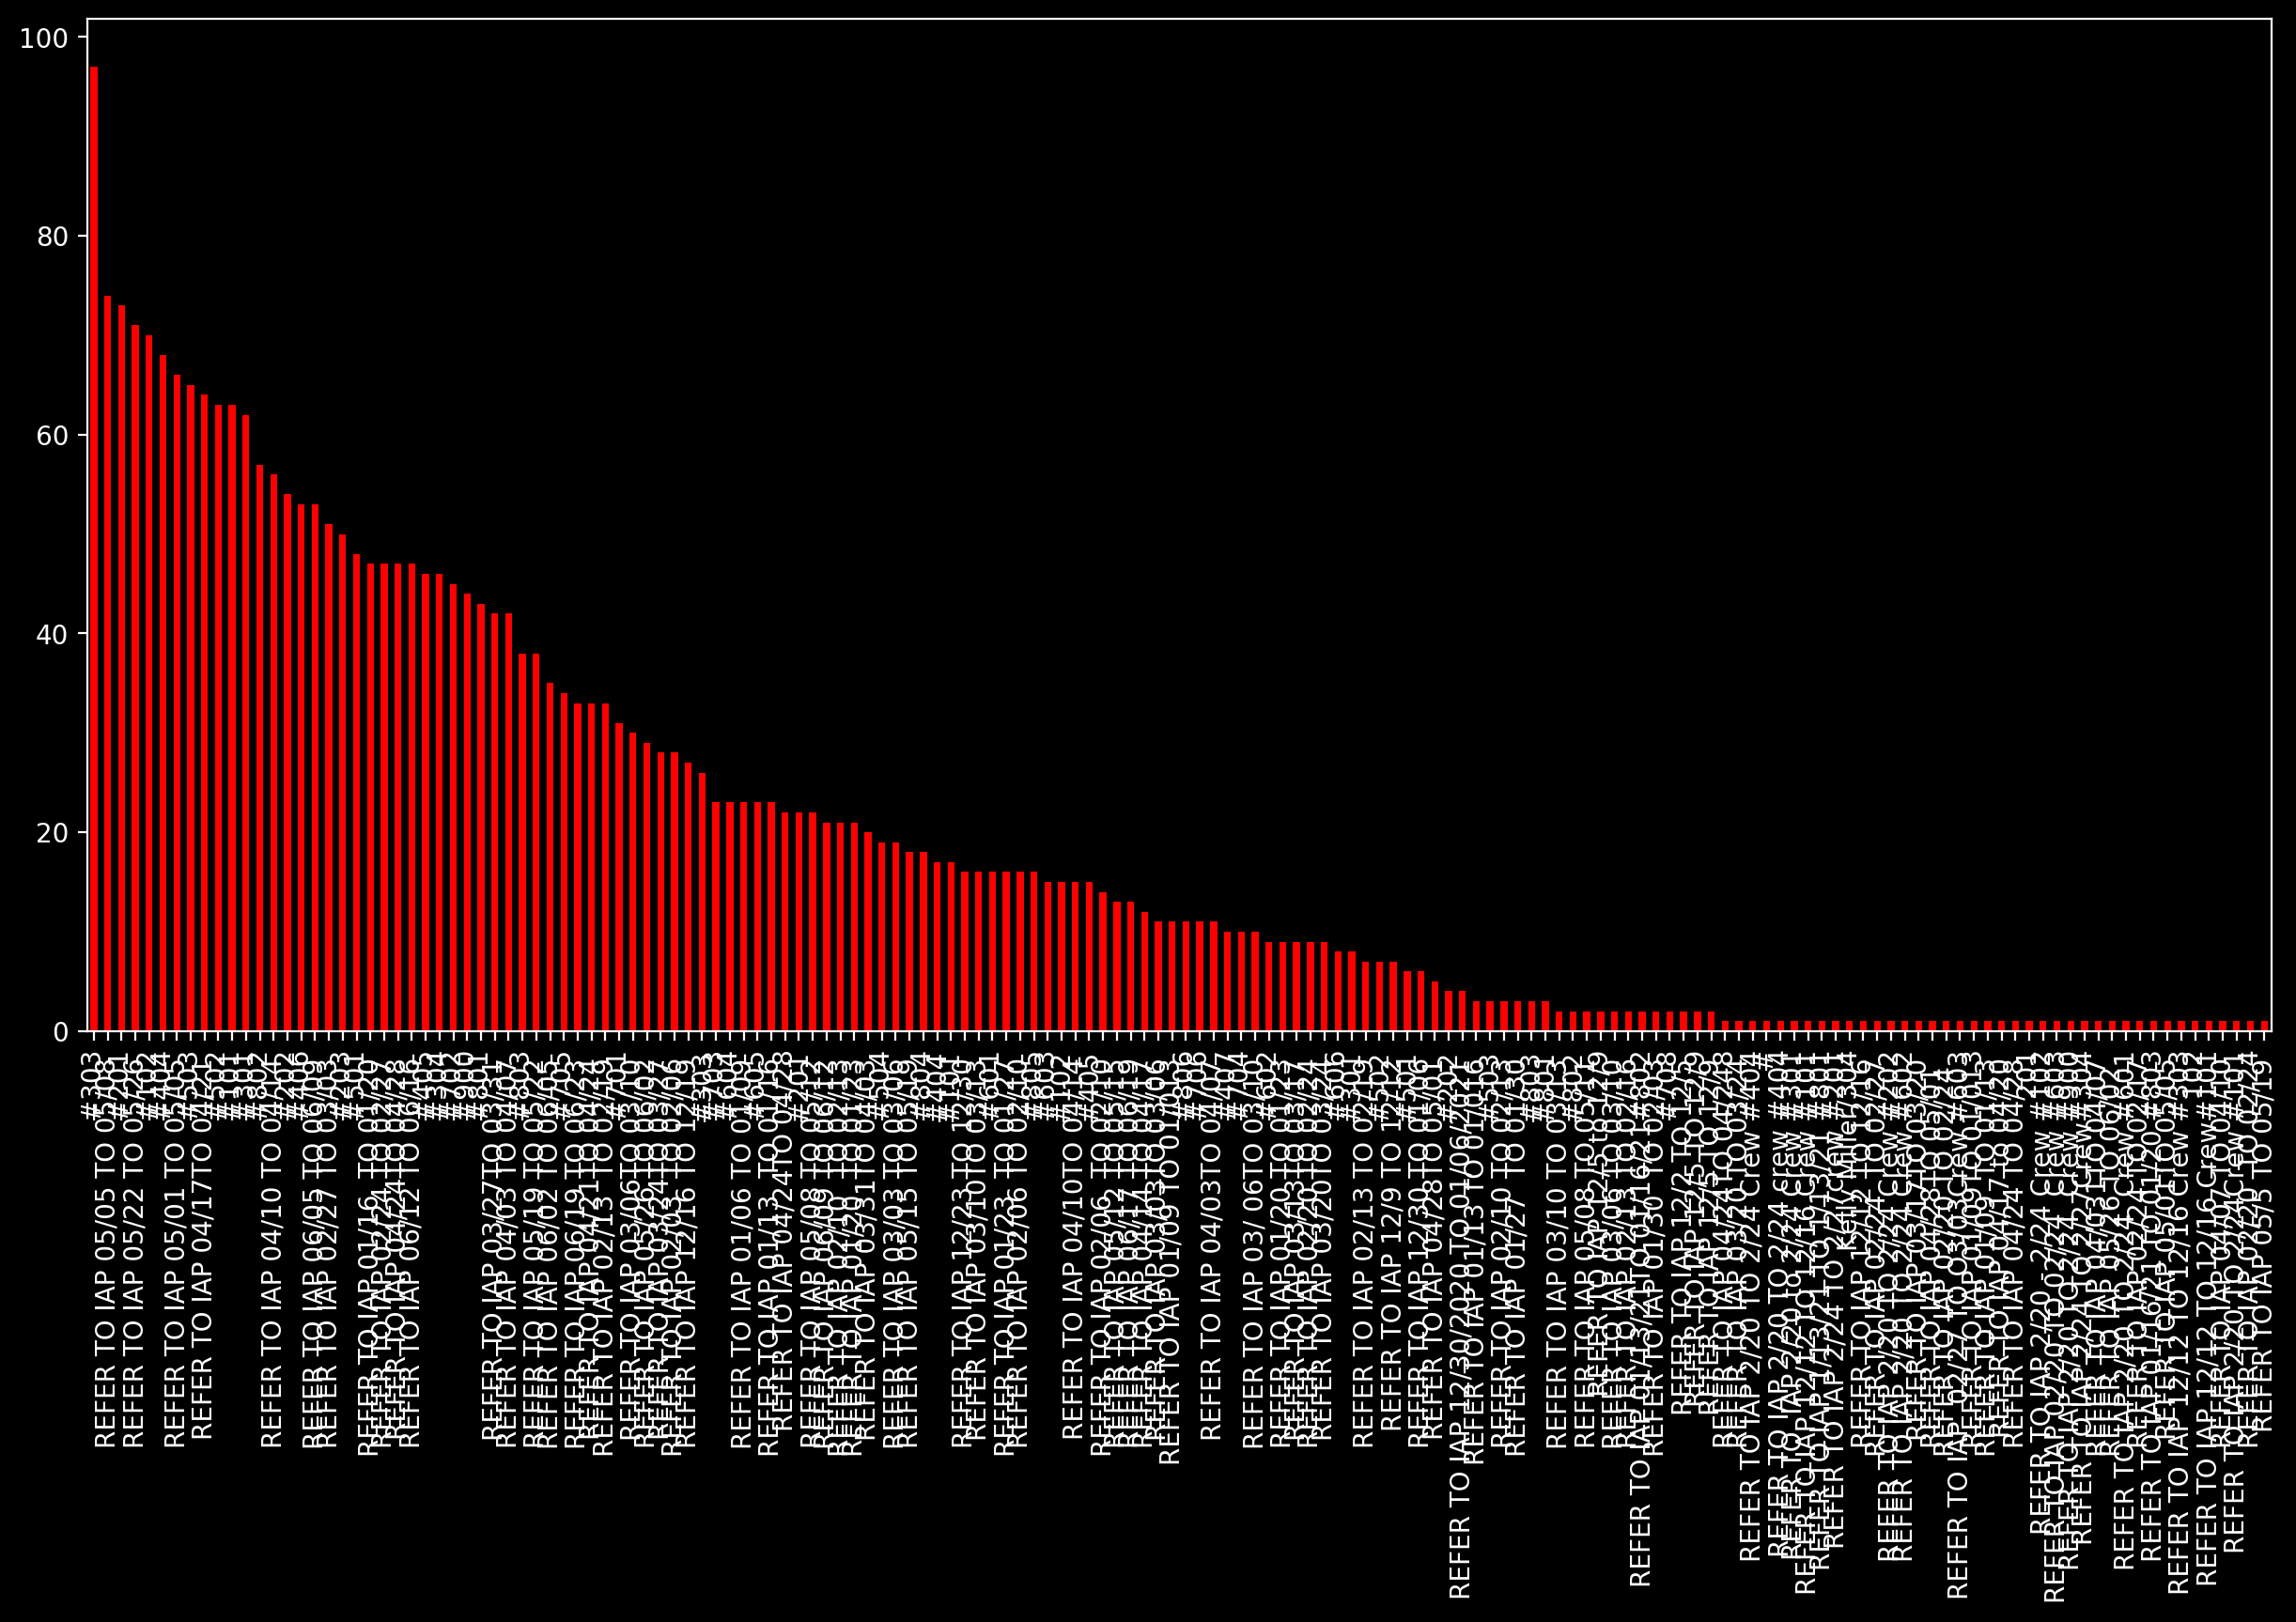

In [18]:
crew_lists.stack().value_counts().plot(kind='bar', figsize=(15,7), color="red")